<a href="https://colab.research.google.com/github/loandangnt/black-friday/blob/master/ggcolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement

Predict future sales amount for specific User and Product Code based on last month sales.

## Exploratory analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [ ]:
df = pd.read_csv('/Users/dangloan/Documents/learning_analytics/project/3_data/black_friday/train.csv')

In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df,check_correlation = True)

In [ ]:
profile.to_file(outputfile="output.html")

In [ ]:
from IPython.display import HTML
HTML(filename='/Users/dangloan/Documents/learning_analytics/' \
                 'project/code/project_1/output.html')

Number of variables,12
Number of observations,550068
Total Missing (%),8.4%
Total size in memory,50.4 MiB
Average record size in memory,96.0 B
Numeric,6
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,0


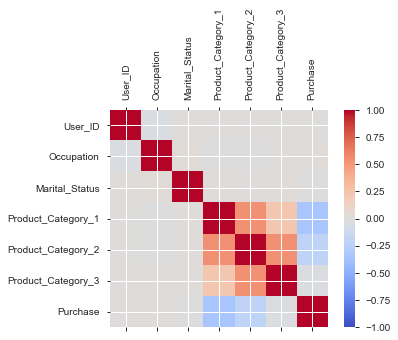

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [ ]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


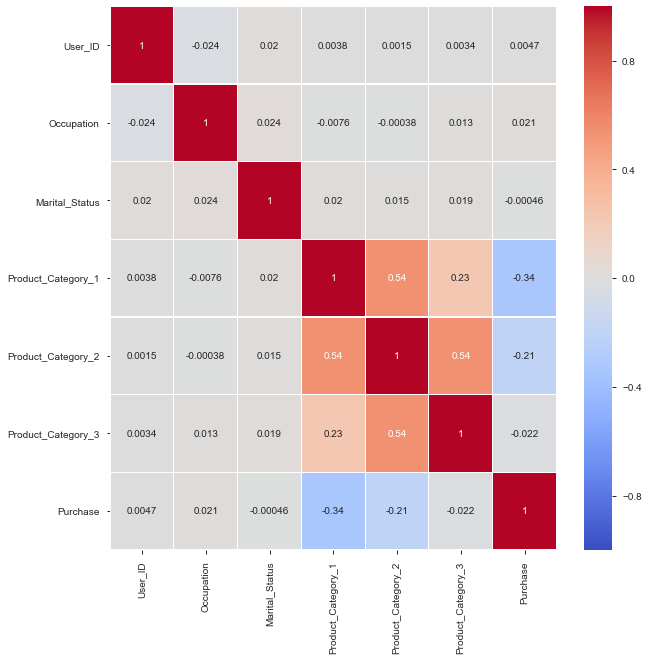

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           linecolor='white',
           linewidths='0.1')

In [ ]:
c = df.groupby('Occupation')['Purchase'].agg(['count','mean']).reset_index()\
        .sort_values('mean', ascending=False)
c

,Occupation,count,mean
17,17,40043,9821.478236
12,12,31179,9796.640239
15,15,12165,9778.891163
8,8,1546,9532.592497
14,14,27309,9500.702772
7,7,59133,9425.728223
16,16,25371,9394.464349
5,5,12177,9333.149298
13,13,7728,9306.351061
6,6,20355,9256.535691


Text(0.5, 1.0, 'Purchase count and mean by Occupation codes')

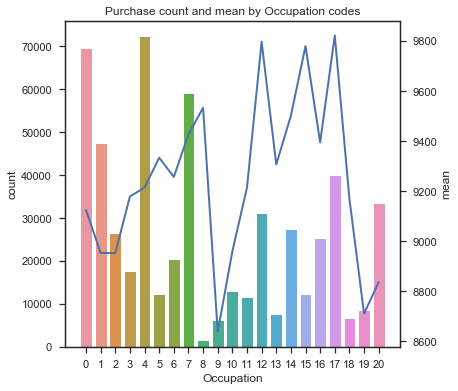

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10,10))
# fig, ax = plt.subplots(ncols=2)

sns.set(style="ticks", rc={"lines.linewidth": 2})
fig, ax1 = plt.subplots(figsize=(6,6))
ax2 = ax1.twinx()

sns.barplot(x='Occupation', y='count', data=c, ax = ax1)
sns.lineplot(x='Occupation',y='mean', data=c, ax=ax2)
plt.title('Purchase count and mean by Occupation codes')
# plt.show()
# sns.set()

There are some differences in Purchase amount (mean) between different Occupations. I observe Occupation code 8 and 9 have some fluctuations in mean that could due to small number of Purchase (count), the rest are fine.

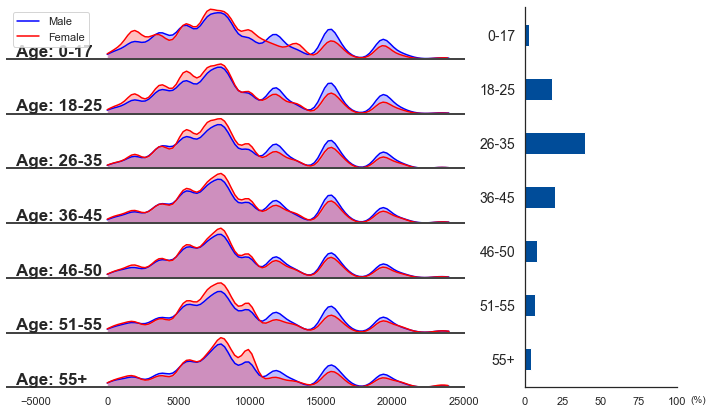

In [ ]:
import matplotlib.gridspec as gridspec

freq = ((df.Age.value_counts(normalize = True).reset_index().sort_values(by = 'index').Age)*100).tolist()
number_gp = 7
# freq = the percentage for each age group, and there’re 7 age groups.


def ax_settings(ax, var_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(2)
    
    ax.text(0.02, 0.05, var_name, fontsize=17, fontweight="bold", transform = ax.transAxes) 
    return None
# Manipulate each axes object in the left. Try to tune some parameters and you'll know how each command works.


fig = plt.figure(figsize=(12,7))
gs = gridspec.GridSpec(nrows=number_gp, 
                       ncols=2, 
                       figure=fig, 
                       width_ratios= [3, 1],
                       height_ratios= [1]*number_gp,
                       wspace=0.2, hspace=0.05
                      )
ax = [None]*(number_gp + 1)
features = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
# Create a figure, partition the figure into 7*2 boxes, set up an ax array to store axes objects, and create a list of age group names.  


for i in range(number_gp):
    ax[i] = fig.add_subplot(gs[i, 0])
    
    ax_settings(ax[i], 'Age: ' + str(features[i]), -7000, 25000)    
    
    sns.kdeplot(data=df[(df.Gender == 'M') & (df.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="blue", bw=0.1, legend=False)
    sns.kdeplot(data=df[(df.Gender == 'F') & (df.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="red", bw=0.1,  legend=False)
    
    if i < (number_gp - 1): 
        ax[i].set_xticks([])
# this 'for loop' is to create a bunch of axes objects, and link them to GridSpec boxes. Then, we manipulate them with sns.kdeplot() and ax_settings() we just defined.

ax[0].legend(['Male', 'Female'], facecolor='w')
# adding legends on the top axes object  

ax[number_gp] = fig.add_subplot(gs[:, 1])
ax[number_gp].spines['right'].set_visible(False)
ax[number_gp].spines['top'].set_visible(False)
ax[number_gp].barh(features, freq, color='#004c99', height=0.4)
ax[number_gp].set_xlim(0,100)
ax[number_gp].invert_yaxis()
ax[number_gp].text(1.09, -0.04, '(%)', fontsize=10, transform = ax[number_gp].transAxes)   
ax[number_gp].tick_params(axis='y', labelsize = 14)
# manipulate the bar plot on the right. Try to comment out some of the commands to see what they actually do to the bar plot.

plt.show()

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


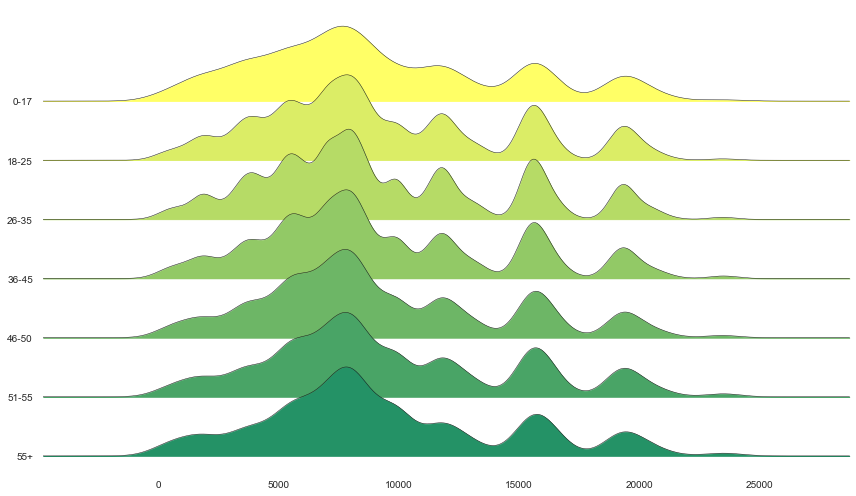

In [ ]:
import joypy
from matplotlib import cm
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(12,7))
ax2 = ax1.twinx()

joypy.joyplot(df[df.Gender == 'M'], by='Age', column='Purchase',ax=ax1,
              linewidth=0.5,
             colormap=cm.summer_r)
# joypy.joyplot(df[df.Gender == 'F'], by='Age', column='Purchase',ax=ax2,
#               linewidth=0.5,
#              color='#69b3a2')

ax[0].legend(['Male', 'Female'], facecolor='w')
plt.show()

I am going to encode categorical columns using One Hot: Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status. For high cadinarity columns (Produc Cat) I am searching for a better solution. May need to look at some statistics to group them.
In the correlation report, there are some correlations between Product Cats and Purchase. I may look deeper into that.

Spend more time looking at your data and manipulating it into the format you need. Most projects involve a lot of data manipulation and relatively little model tuning. Friends who are currently hiring tell me many job candidates can describe algorithms, but the vast majority lack the Pandas skills to be efficient with real work.
https://towardsdatascience.com/what-70-of-data-science-learners-do-wrong-ac35326219e4

In [ ]:
df['ID'] = df['User_ID'].apply(str) + df['Product_ID'].apply(str)
print(df.shape)
print(df['ID'].nunique())

(550068, 13)
550068


In [ ]:
df.ID.head()

0    1000001P00069042
1    1000001P00248942
2    1000001P00087842
3    1000001P00085442
4    1000002P00285442
Name: ID, dtype: object

In [ ]:
df.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

My approach is to try plug the data into a model: a **linear regression** and an **xgboost regression**. Encode categorical data as above.
Which error metric should I prefer?
How to choose the best feature (feature selection)? Use the pipeline. If not good, try look at the data and do univariate analysis.
Tune the model -> grid search

## Develop XGBoost regression model with sklearn pipeline

## Develop XGBoost regression model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error
# import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV   #Perforing grid search
# from scipy.stats import skew
# from collections import OrderedDict

### Read train and test sets

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/train.csv')
real_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/test.csv')

In [ ]:
every_column_except_y = [col for col in df.columns 
                         if col not in ['Purchase','User_ID','Product_ID']]
column_y = ['Purchase']

X = df[every_column_except_y]
y = df[column_y]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(440054, 9)
(110014, 9)
(440054, 1)
(110014, 1)


### Encode categorical features

In [ ]:
# import category_encoders as ce

# onehot_cols = [ 'Gender','Age','Occupation',
#                  'City_Category','Stay_In_Current_City_Years',
#                  'Marital_Status']

# ce_one_hot = ce.OneHotEncoder(cols = onehot_cols)
# train = ce_one_hot.fit_transform(df)
# test = ce_one_hot.fit_transform(real_test)


# hash_cols = ['Product_Category_1','Product_Category_2','Product_Category_3']

# ce_hash = ce.HashingEncoder(cols = hash_cols, n_components=10)
# train = ce_hash.fit_transform(train)
# test = ce_hash.fit_transform(test)

# model = xgboost.XGBRegressor(colsample_bytree=0.4,
#                  gamma=0,                 
#                  learning_rate=0.07,
#                  max_depth=3,
#                  min_child_weight=1.5,
#                  n_estimators=10000,                                                                    
#                  reg_alpha=0.75,
#                  reg_lambda=0.45,
#                  subsample=0.6,
#                  seed=42) 

# every_column_except_y= [col for col in train.columns if col not in ['Purchase','User_ID','Product_ID']]
# model.fit(train[every_column_except_y],train['Purchase'])

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 92kB 5.8MB/s 


In [ ]:
import category_encoders as ce

onehot_cols = ['Gender','Age','City_Category',
               'Stay_In_Current_City_Years',
               'Marital_Status']

ce_one_hot = ce.OneHotEncoder(cols = onehot_cols)
train = ce_one_hot.fit_transform(X_train)
test = ce_one_hot.fit_transform(X_test)


hash_cols = ['Occupation','Product_Category_1','Product_Category_2','Product_Category_3']

ce_hash = ce.HashingEncoder(cols = hash_cols, n_components=11)
train = ce_hash.fit_transform(train)
test = ce_hash.fit_transform(test)

In [ ]:
train.columns.tolist()

['col_0',
 'col_1',
 'col_2',
 'col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'col_8',
 'col_9',
 'col_10',
 'Gender_1',
 'Gender_2',
 'Age_1',
 'Age_2',
 'Age_3',
 'Age_4',
 'Age_5',
 'Age_6',
 'Age_7',
 'City_Category_1',
 'City_Category_2',
 'City_Category_3',
 'Stay_In_Current_City_Years_1',
 'Stay_In_Current_City_Years_2',
 'Stay_In_Current_City_Years_3',
 'Stay_In_Current_City_Years_4',
 'Stay_In_Current_City_Years_5',
 'Marital_Status_1',
 'Marital_Status_2']

### Feature Selection

In [ ]:
model1 = xgboost.XGBRegressor() 
model1.fit(train,y_train)

[13:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
a = model1.get_booster().get_score(importance_type='weight')
list_key_value = [ [k,v] for k, v in a.items() ]
b = pd.DataFrame(list_key_value, columns = ['Feature', 'Weight'])
b.sort_values('Weight', ascending=False)

,Feature,Weight
4,col_8,4653
6,col_2,3794
2,col_6,2320
12,col_0,2275
0,col_5,2002
7,col_1,1966
10,Gender_1,1879
19,City_Category_1,1834
38,Marital_Status_1,1808
25,City_Category_3,1800


In [ ]:
a=list(zip(every_column_except_y,model1.feature_importances_))
b = pd.DataFrame(a, columns = ['Feature', 'Importance'])
c= b.sort_values('Importance', ascending=False)
c

,Feature,Importance
8,Product_Category_3,0.208591
5,Marital_Status,0.195659
6,Product_Category_1,0.131139
2,Occupation,0.061094
1,Age,0.052592
7,Product_Category_2,0.037324
0,Gender,0.032689
3,City_Category,0.000000
4,Stay_In_Current_City_Years,0.000000


In [ ]:
a

[('Gender', 0.03268865),
 ('Age', 0.052591722),
 ('Occupation', 0.061094146),
 ('City_Category', 0.0),
 ('Stay_In_Current_City_Years', 0.0),
 ('Marital_Status', 0.19565909),
 ('Product_Category_1', 0.13113919),
 ('Product_Category_2', 0.037324402),
 ('Product_Category_3', 0.20859109)]

### Model selection

#### Train test set evaluation

In [ ]:
predictions = model1.predict(test)
model1.score(test, y_test)

0.2924001484061767

#### Cross validation evaluation

In [ ]:
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# # load data
# dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# # split data into X and y
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # CV model
# model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))